# Linear Regression from Scratch 

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable.

The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

We will first learn to implement simple linear regression from scratch with python.

## Load Dataset

We will use the swedish insurance dataset to demonstrate simple linear regression. It involves predicting the total payment for all claims in thousands of Swedish Kronor (y) given the total number of claims (x).

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('insurance.csv')
df.head()

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [2]:
df.describe()

,X,Y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


## Train test split

In [3]:
msk = np.random.rand(len(df)) < 0.8
train_df = df[msk]
test_df = df[~msk]

In [4]:
print(len(train_df))
print(len(test_df))

47
16


## Plot Data

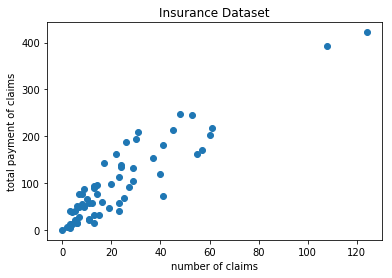

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df['X'], df['Y'])
plt.xlabel('number of claims')
plt.ylabel('total payment of claims')
plt.title('Insurance Dataset')
plt.show()

## Calculate Mean, Variance and Covariance

In [7]:
x = train_df['X'].values
y = train_df['Y'].values

Calculate mean - 
The mean is the average of the numbers: a calculated "central" value of a set of numbers. 

In [8]:
def mean(values):
    return np.mean(values)

Calculate variance - The average of the squared differences from the Mean

In [9]:
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

In [10]:
mean_X, mean_Y = mean(x), mean(y)

In [11]:
var_x, var_y = variance(x, mean_X), variance(y, mean_Y)

In [12]:
print(mean_X, var_x)

25.914893617021278 30017.659574468093


In [13]:
print(mean_Y, var_y)

106.7468085106383 403487.47702127654


Calculate covariance

In [14]:
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x)*(y[i] - mean_y)
    return covar

In [15]:
covariance(x, mean_X, y, mean_Y)

102445.48723404256

## Estimate Coefficients 

In the equation y = b0 + b1*x,

b1 = covariance(x,y) / variance(x) and

b0 = mean(y) - b1 * mean(x)

In [16]:
def coefficients(data):
    a,b = list(data)
    x = data[a].values
    y = data[b].values
    mean_x, mean_y = mean(x), mean(y)
    b1 = covariance(x, mean_x, y, mean_y) / variance(x, mean_x)
    b0 = mean_y - b1 * mean_x
    return [b0, b1]

In [17]:
coefficients(df)

[19.99448575911481, 3.4138235600663664]

## Make Predictions 

Once the coefficients are estimated, we can use them to make predictions using this equation,
y = b0 + b1 * x

In [18]:
predictions = []
b0, b1 = coefficients(train_df)
for i,row in test_df.iterrows():
    ynew = b0 + b1 * row['X']
    predictions.append(ynew)

In [19]:
predictions

[52.43181347150261,
 25.12908869247183,
 49.01897287412376,
 49.01897287412376,
 31.954769887229524,
 86.56021944529108,
 18.303407497714133,
 38.780451081987216,
 35.36761048460837,
 59.2574946662603,
 158.22987199024686,
 45.606132276744916,
 62.670335263639146,
 117.27578482170071,
 124.1014660164584,
 107.03726302956416]

## Plot the predictions 

In [20]:
x_test = test_df['X'].values
y_test = test_df['Y'].values

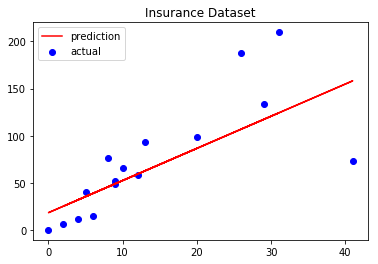

In [21]:
regression_line = [(b0 + b1*x) for x in x_test]
plt.scatter(x_test, test_df['Y'], c='b', label='actual')
plt.plot(x_test, regression_line, c='r', label='prediction')
plt.legend(loc='upper left')
plt.title('Insurance Dataset')
plt.show()

## Calculate root mean squared error (RMS)

In [22]:
from math import sqrt

def rmse(actual, predicted):
    sum_err = 0.0
    for i in range(len(actual)):
        pred_err = predicted[i] - actual[i]
        sum_err += pred_err**2
    mean_err = sum_err / float(len(actual))
    return sqrt(mean_err)

In [23]:
rmse(y_test, predictions)

39.62670206344892